In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from sklearn import linear_model as lm
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from scipy.interpolate import UnivariateSpline

dx=pd.read_pickle('./Data/oneyeardataFE1.pkl')

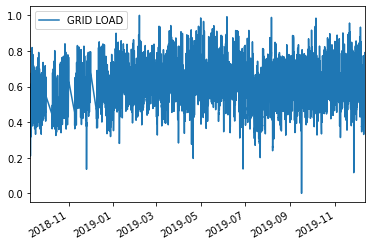

In [16]:
dx['2018-9-1':].plot(y='GRID LOAD')

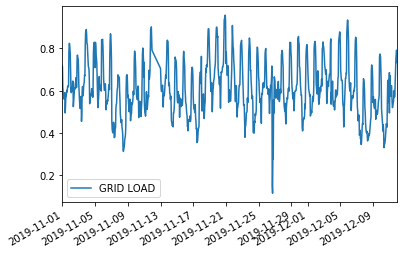

In [17]:
dx['2019-11-1':].plot(y='GRID LOAD')

In [18]:
#creating the test and train sets
train=dx['2018-9-1':'2019-11-1'].copy(deep=True)
test=dx['2019-11-1':].copy(deep=True)

In [20]:
dx.columns
attb=['Dayofweek',
       'HourofDay', 'DayofMonth', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'peakload',
       'mediumload', 'minload', 'peakdayofmonth', 'mindayofmonth',
       'normaldayofmonth', 'shift-1', 'shift-2', 'shift-3', 'shift-4',
       'shift-5', 'shift-13', 'shift-14', 'shift-18', 'shift-19', 'shift-20',
       'shift-21', 'shift-22', 'shift-23', 'shift-24', 'shift-26', 'shift-50',
       'shift-74', 'shift-98', 'shift-122', 'shift-146', 'shift-170',
       'shift-194', 'shift-290', 'shift-722'
    ]
len(attb)

40

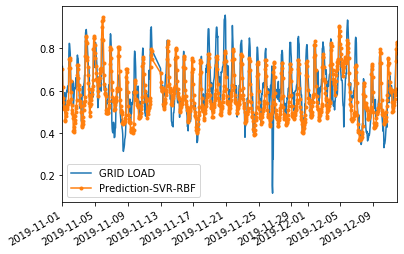

In [36]:
attb = ['Dayofweek',
        'HourofDay', 'DayofMonth', 'Monday', 'Tuesday',
        'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'peakload',
        'mediumload', 'minload', 'peakdayofmonth', 'mindayofmonth',
        'normaldayofmonth', 'shift-1', 'shift-2', 'shift-3', 'shift-4',
        'shift-5', 'shift-13', 'shift-14', 'shift-18', 'shift-19', 'shift-20',
        'shift-21', 'shift-22', 'shift-23', 'shift-24', 'shift-26', 'shift-50',
        'shift-74', 'shift-98', 'shift-122', 'shift-146', 'shift-170',
        'shift-194', 'shift-290', 'shift-722'
        ]

from sklearn.svm import SVR

reg3 = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=.01)
#reg3 = SVR(kernel='poly', C=100, gamma='auto', degree=7, epsilon=.1, coef0=1)
# reg3.fit(train[attb].loc['2004-12-25':],train['NOx(GT)'].loc['2004-12-25':])
reg3.fit(train[attb], train['GRID LOAD'])
window = train['GRID LOAD'].values.tolist()
dta_lst = []
ctr = 0
timestamp=[]
for x in test.index:
    lst = [test['Dayofweek'].loc[x], test['HourofDay'].loc[x], test['DayofMonth'].loc[x],
           test['Monday'].loc[x], test['Tuesday'].loc[x], test['Wednesday'].loc[x],
           test['Thursday'].loc[x], test['Friday'].loc[x], test['Saturday'].loc[x],
           test['Sunday'].loc[x], test['peakload'].loc[x], test['mediumload'].loc[x],
           test['minload'].loc[x], test['peakdayofmonth'].loc[x], test['mindayofmonth'].loc[x],
           test['normaldayofmonth'].loc[x],
           window[-1], window[-2], window[-3], window[-4], window[-5], window[-13], window[-14],
           window[-18], window[-19], window[-20], window[-21], window[-22], window[-23], window[-24],
           window[-26], window[-50], window[-74], window[-98], window[-122], window[-146], window[-170],
           window[-194], window[-290], window[-722]
           ]
    # test['Month'].loc[x],
    # test['DayofMonth'].loc[x],
    # test['Monday'].loc[x],
    # test['Tuesday'].loc[x],test['Wednesday'].loc[x],test['Thursday'].loc[x],
    # test['Friday'].loc[x],test['Saturday'].loc[x],test['Sunday'].loc[x],

    try:

        pred = reg3.predict(np.asarray([lst]).reshape(1, -40))
        timestamp.append(x)
    except:
        continue
    window.append(pred[0])
    lst.append(pred[0])
    dta_lst.append(lst)

collist = ['Dayofweek',
           'HourofDay', 'DayofMonth', 'Monday', 'Tuesday',
           'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'peakload',
           'mediumload', 'minload', 'peakdayofmonth', 'mindayofmonth',
           'normaldayofmonth', 'shift-1', 'shift-2', 'shift-3', 'shift-4',
           'shift-5', 'shift-13', 'shift-14', 'shift-18', 'shift-19', 'shift-20',
           'shift-21', 'shift-22', 'shift-23', 'shift-24', 'shift-26', 'shift-50',
           'shift-74', 'shift-98', 'shift-122', 'shift-146', 'shift-170',
           'shift-194', 'shift-290', 'shift-722',
           'Prediction']

prediction = pd.DataFrame(dta_lst, columns=collist, dtype='float')
prediction.index = timestamp
test['Prediction-SVR-RBF'] = prediction['Prediction'].copy(deep=True)

fig, ax = plt.subplots()
# finding trend using rolling window operation
test.plot(y='GRID LOAD', ax=ax)
test.plot(y='Prediction-SVR-RBF', ax=ax, style='.-')

In [37]:
#mean_squared_error(test['GRID LOAD'], test['Prediction-SVR-RBF'])
test.dropna(inplace=True)

In [38]:
mean_squared_error(test['GRID LOAD'], test['Prediction-SVR-RBF'])

0.00837306712076962

In [39]:
r2_score(test['GRID LOAD'].loc['2019-11-1':'2019-11-10'], test['Prediction-SVR-RBF'].loc['2019-11-1':'2019-11-10'])

0.5326058567586247